In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import functions as f
import soilconctomcnp as sm

In [65]:
mass_functions = pd.read_pickle('data/massfunctions.pkl')

In [66]:
import json
with open('data/field_info.json') as f:
    field_info = json.load(f)
fence = np.array(field_info['corners'])

In [67]:
spectrums = 'data/spectrums.npy'
spectrums = np.load(spectrums).T

mcnpfilenames = pd.read_csv('data/mcnpfilenames.csv')
# filenames = pd.read_csv('data/filenames.csv')
positions = pd.read_csv('data/positions.csv')

In [68]:
spectrums.shape

(986, 935)

In [69]:
mcnpfilenames

filename file_id function_name  \
0      mcnp_sims/field/compute/input/0_0.txt     0_0         const   
1      mcnp_sims/field/compute/input/0_1.txt     0_1         const   
2      mcnp_sims/field/compute/input/0_2.txt     0_2         const   
3      mcnp_sims/field/compute/input/0_3.txt     0_3         const   
4      mcnp_sims/field/compute/input/0_4.txt     0_4         const   
..                                       ...     ...           ...   
995  mcnp_sims/field/compute/input/4_195.txt   4_195    quad_plane   
996  mcnp_sims/field/compute/input/4_196.txt   4_196    quad_plane   
997  mcnp_sims/field/compute/input/4_197.txt   4_197    quad_plane   
998  mcnp_sims/field/compute/input/4_198.txt   4_198    quad_plane   
999  mcnp_sims/field/compute/input/4_199.txt   4_199    quad_plane   

                x             y  \
0   -16238.302575 -10466.546735   
1   -10730.798150 -10466.546735   
2    -5223.293725 -10466.546735   
3      284.210700 -10466.546735   
4     5791.715125 -10466.546735   
..            ...           ...   
995  10608.904352  15263.462581   
996  16116.408777  15263.462581   
997  11844.726799  15940.568089   
998  10888.262822  16617.673598   
999  16395.767247  16617.673598   

                                                  mats  \
0    m400000 6000 -0.004992609570236395 7014 -0.004...   
1    m400000 6000 -0.004992609570236395 7014 -0.004...   
2    m400000 6000 -0.004992609570236395 7014 -0.004...   
3    m400000 6000 -0.004992609570236395 7014 -0.004...   
4    m400000 6000 -0.004992609570236395 7014 -0.004...   
..                                                 ...   
995  m400000 6000 -0.005432495471061378 7014 -0.005...   
996  m400000 6000 -0.005393589610361974 7014 -0.005...   
997  m400000 6000 -0.005452987331398699 7014 -0.005...   
998  m400000 6000 -0.005449548906474929 7014 -0.005...   
999  m400000 6000 -0.005612456118396415 7014 -0.005...   

                             avg_sample  success  
0    [0.00499261 0.00499261 0.99001478]     True  
1    [0.00499261 0.00499261 0.99001478]     True  
2    [0.00499261 0.00499261 0.99001478]     True  
3    [0.00499261 0.00499261 0.99001478]     True  
4    [0.00499261 0.00499261 0.99001478]     True  
..                                  ...      ...  
995  [0.00543593 0.00543593 0.98912813]     True  
996  [0.00545239 0.00545239 0.98909522]     True  
997  [0.00551715 0.00551715 0.98896571]     True  
998  [0.00558962 0.00558962 0.98882076]     True  
999  [0.00559389 0.00559389 0.98881222]     True  

[1000 rows x 8 columns]

In [70]:
x = positions['x']
y = positions['y']
avg_sample = mcnpfilenames['avg_sample']

avg_sample = avg_sample.apply(lambda x: x.split('[')[1].split(']')[0].split(' '))
def _fun(x):
    if x == '':
        pass
    else:
        return float(x)
avg_sample = avg_sample.apply(lambda x: [_fun(i) for i in x])
avg_sample = avg_sample.apply(lambda x: [i for i in x if i is not None])
avg_sample = avg_sample.apply(lambda x: np.array(x))
_avg_sample = np.zeros((len(avg_sample), 3))
for i in range(len(avg_sample)):
    # print(avg_sample[i])
    _avg_sample[i] = avg_sample[i]

avg_sample = _avg_sample
c_avg_sample = avg_sample[:, 0]
n_avg_sample = avg_sample[:, 1]
si_avg_sample = avg_sample[:, 2]

In [71]:
avg_sample[0]

array([0.00499261, 0.00499261, 0.99001478])

In [72]:
positions

x             y
0   -16238.302575 -10466.546735
1   -10730.798150 -10466.546735
2    -5223.293725 -10466.546735
3      284.210700 -10466.546735
4     5791.715125 -10466.546735
..            ...           ...
995  10608.904352  15263.462581
996  16116.408777  15263.462581
997  11844.726799  15940.568089
998  10888.262822  16617.673598
999  16395.767247  16617.673598

[1000 rows x 2 columns]

# Map and spectrums

In [73]:
mcnpfilenames['function_name'].unique()

array(['const', 'linear', 'plane', 'quad', 'quad_plane'], dtype=object)

In [74]:
_function_name = 'quad_plane'
_ind_2 = mcnpfilenames['success']==True
successful = mcnpfilenames[_ind_2]
successful['spectrum'] = [x for x in spectrums[1:, :]]
_ind_1 = successful['function_name']==_function_name
_ind = _ind_1 & _ind_2
working_df = successful[_ind]
working_df.head()

/tmp/ipykernel_868792/3036207258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['spectrum'] = [x for x in spectrums[1:, :]]
/tmp/ipykernel_868792/3036207258.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  working_df = successful[_ind]


filename file_id function_name  \
800  mcnp_sims/field/compute/input/4_0.txt     4_0    quad_plane   
801  mcnp_sims/field/compute/input/4_1.txt     4_1    quad_plane   
803  mcnp_sims/field/compute/input/4_3.txt     4_3    quad_plane   
804  mcnp_sims/field/compute/input/4_4.txt     4_4    quad_plane   
805  mcnp_sims/field/compute/input/4_5.txt     4_5    quad_plane   

                x             y  \
800 -16238.302575 -10466.546735   
801 -10730.798150 -10466.546735   
803    284.210700 -10466.546735   
804   5791.715125 -10466.546735   
805  11299.219550 -10466.546735   

                                                  mats  \
800  m400000 6000 -0.005073564536646166 7014 -0.005...   
801  m400000 6000 -0.004965516615157975 7014 -0.004...   
803  m400000 6000 -0.005244032864299312 7014 -0.005...   
804  m400000 6000 -0.005195596836730286 7014 -0.005...   
805  m400000 6000 -0.005299089965868286 7014 -0.005...   

                             avg_sample  success  \
800  [0.00502088 0.00502088 0.98995824]     True   
801     [0.0050919 0.0050919 0.9898162]     True   
803  [0.00518284 0.00518284 0.98963433]     True   
804  [0.00521154 0.00521154 0.98957692]     True   
805  [0.00523058 0.00523058 0.98953885]     True   

                                              spectrum  
800  [0.000330998, 2.35e-07, 0.00019824, 0.00011173...  
801  [0.000330843, 2.31e-07, 0.000198159, 0.0001117...  
803  [0.000330701, 2.3e-07, 0.000198208, 0.00011171...  
804  [0.000330775, 2.32e-07, 0.00019821, 0.00011168...  
805  [0.000330862, 2.34e-07, 0.000198269, 0.0001116...

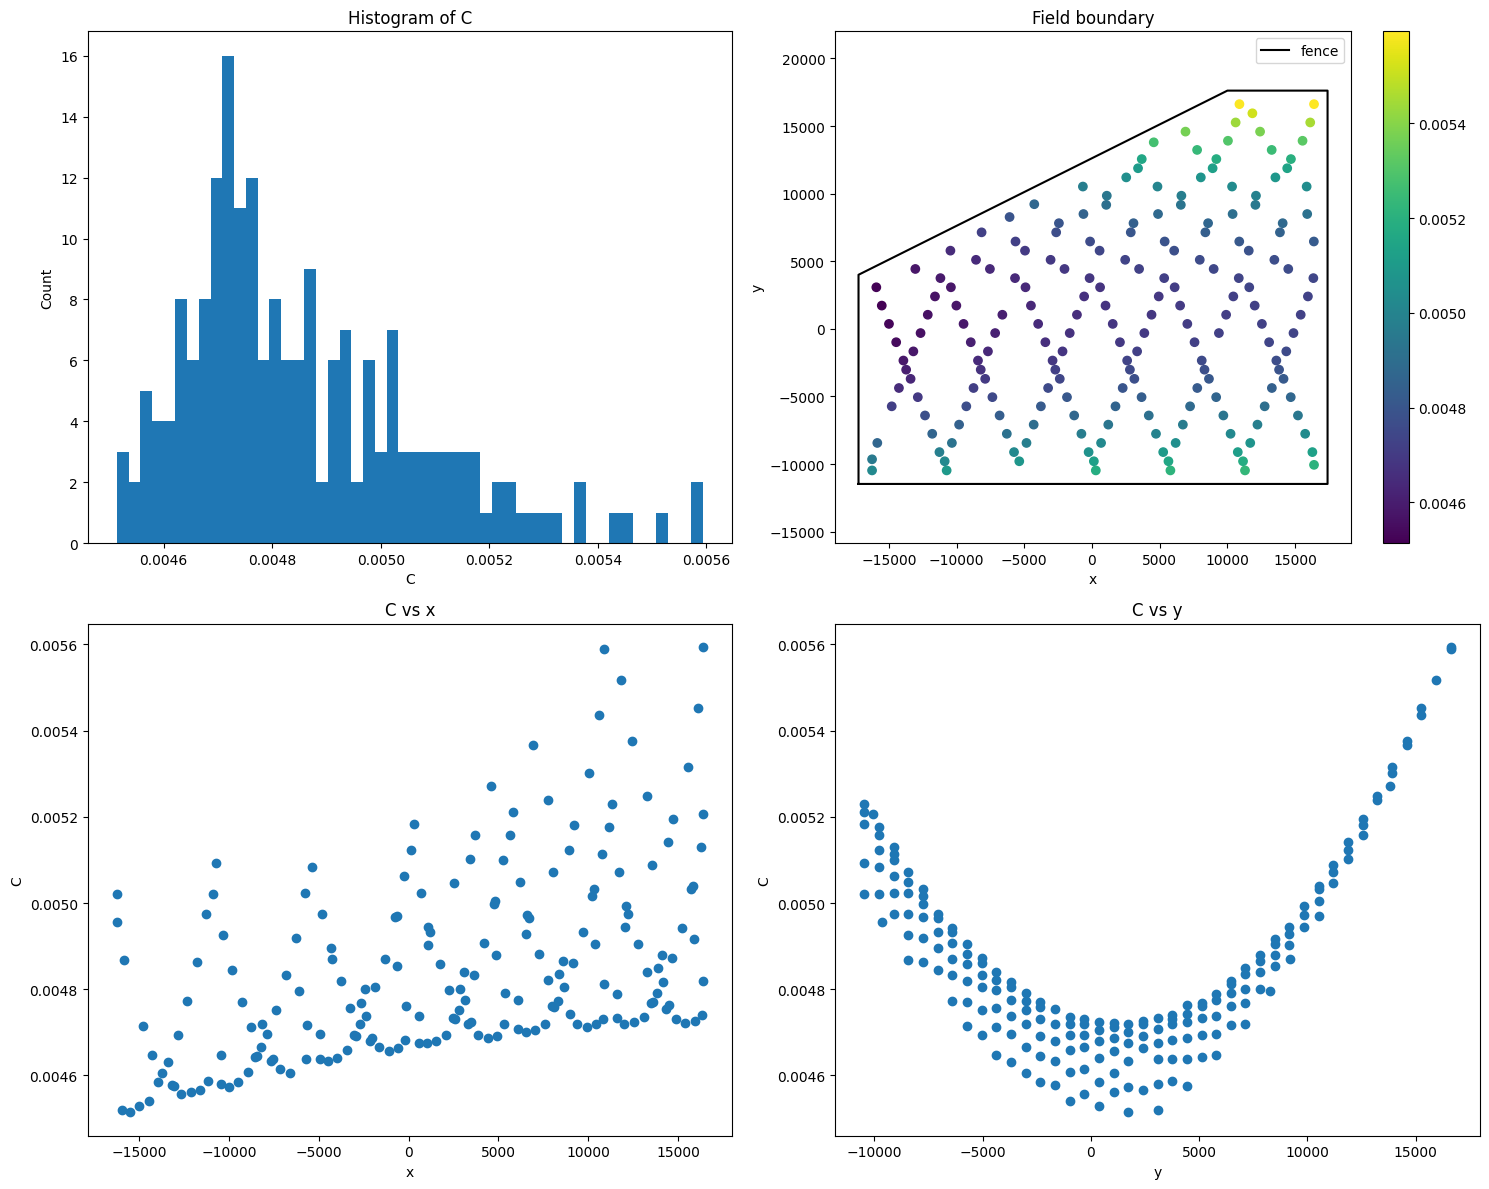

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Histogram of C
axs[0, 0].hist(avg_sample[_ind][:, 0], bins=50)
axs[0, 0].set_xlabel('C')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Histogram of C')

# Plot 2: Field boundary
axs[0, 1].plot(fence[:, 0], fence[:, 1], 'k-', label='fence')
sc = axs[0, 1].scatter(x[_ind], y[_ind], c=avg_sample[_ind][:, 0], cmap='viridis')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
fig.colorbar(sc, ax=axs[0, 1])
axs[0, 1].legend()
axs[0, 1].set_title('Field boundary')
axs[0, 1].axis('equal')

# Plot 3: C vs x
axs[1, 0].scatter(x[_ind], avg_sample[_ind][:, 0])
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('C')
axs[1, 0].set_title('C vs x')

# Plot 4: C vs y
axs[1, 1].scatter(y[_ind], avg_sample[_ind][:, 0])
axs[1, 1].set_xlabel('y')
axs[1, 1].set_ylabel('C')
axs[1, 1].set_title('C vs y')
axs[1, 1].set_yticklabels([])
axs[1, 1].sharey(axs[1, 0])

plt.tight_layout()
plt.show()

In [116]:
bins = spectrums[0]
all_spectrums = working_df['spectrum']
all_spectrums = np.array([x for x in all_spectrums])

In [122]:
all_spectrums.shape

(196, 935)

In [128]:
np.mean(all_spectrums, axis=0)
np.std(all_spectrums, axis=0)

array([1.04354201e-07, 2.80895960e-09, 6.64007111e-08, 4.96777946e-08,
       2.55909091e-08, 2.06284085e-08, 2.28734385e-08, 2.09111834e-08,
       3.66904563e-08, 3.38704577e-08, 4.81535605e-08, 4.05956804e-08,
       3.91155136e-08, 3.35800044e-08, 3.13469732e-08, 3.40195095e-08,
       6.35326265e-08, 3.45355764e-08, 3.05267526e-08, 2.69168336e-08,
       3.91197861e-08, 2.80486725e-08, 3.19993622e-08, 3.20730697e-08,
       2.59342767e-08, 4.61065035e-08, 3.66992413e-08, 3.43037777e-08,
       6.30055470e-08, 2.62096852e-08, 2.08997802e-08, 2.13083679e-08,
       3.06877725e-08, 2.91579271e-08, 2.21436777e-08, 1.84451527e-08,
       3.17200385e-08, 1.90588720e-08, 1.94841642e-08, 2.01394212e-08,
       2.39329942e-08, 1.86590499e-08, 4.81659546e-08, 1.79494081e-08,
       2.00781766e-08, 4.27776048e-08, 2.24201531e-08, 1.69573386e-08,
       1.99087327e-08, 2.26656634e-08, 1.68493853e-08, 1.84831349e-08,
       4.69128442e-08, 2.14358509e-08, 1.51861968e-08, 3.66296045e-08,
      

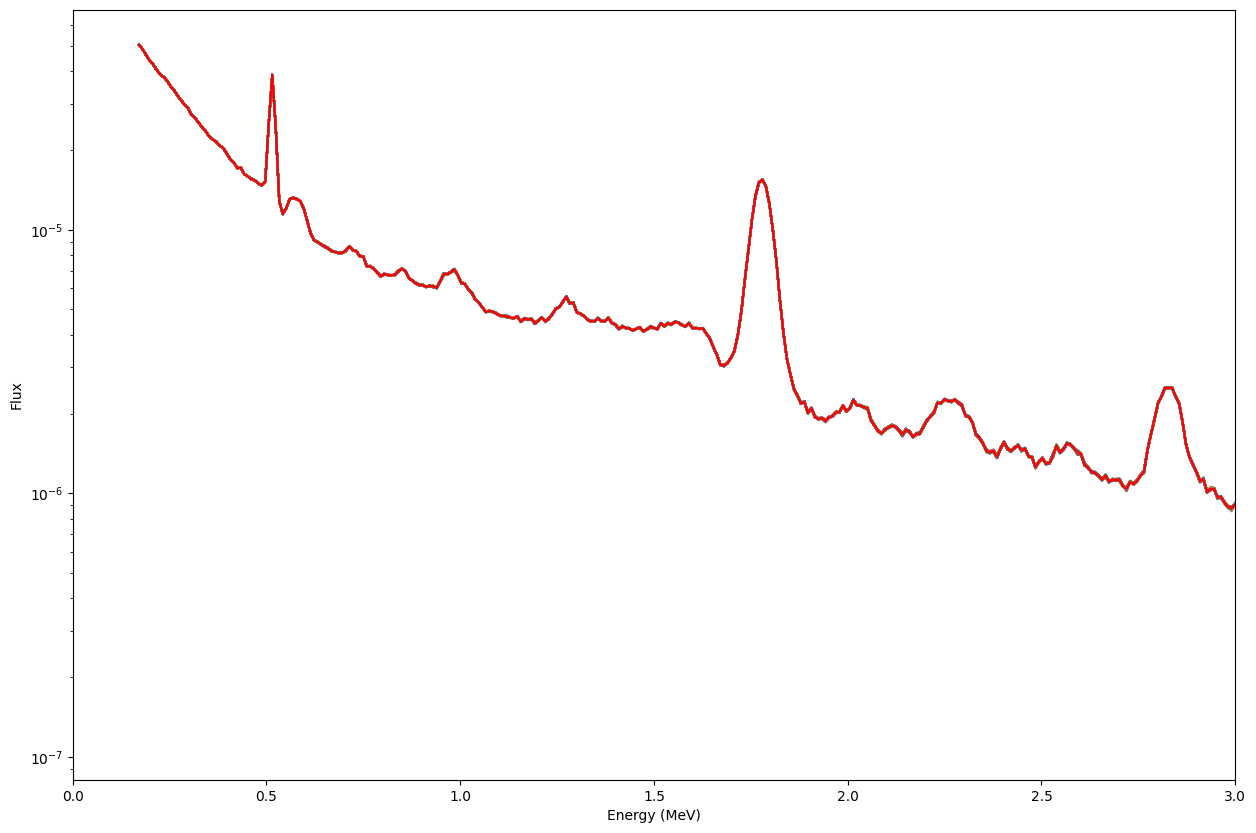

In [131]:
plt.figure(figsize=(15, 10))
for i in range(len(working_df)):
    plt.plot(bins[20:], working_df['spectrum'].iloc[i][20:], alpha=1)
plt.plot(bins[20:], np.mean(all_spectrums, axis=0)[20:], 'r-', label='Average spectrum')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Flux')
plt.xlim(0, 3)
plt.show()
# plt.plot(bins, spectrums[1], 'r-', label='Average spectrum')

In [ ]:
_i = 0
working_row = working_df.iloc[0]

In [ ]:
si_window = [1.6, 1.95]
si_v_pad = 1e-6
si_bins = bins[(bins>si_window[0]) & (bins<si_window[1])]
si_spectrum = working_row['spectrum'][(bins>si_window[0]) & (bins<si_window[1])]
si_spectrum_max = si_spectrum.max()+si_v_pad
si_spectrum_min = si_spectrum.min()-si_v_pad

In [94]:
c_window = [4.0, 5.0]
c_v_pad = 1e-7
c_bins = bins[(bins>c_window[0]) & (bins<c_window[1])]
c_spectrum = working_row['spectrum'][(bins>c_window[0]) & (bins<c_window[1])]
c_spectrum_max = c_spectrum.max()+c_v_pad
c_spectrum_min = c_spectrum.min()-c_v_pad

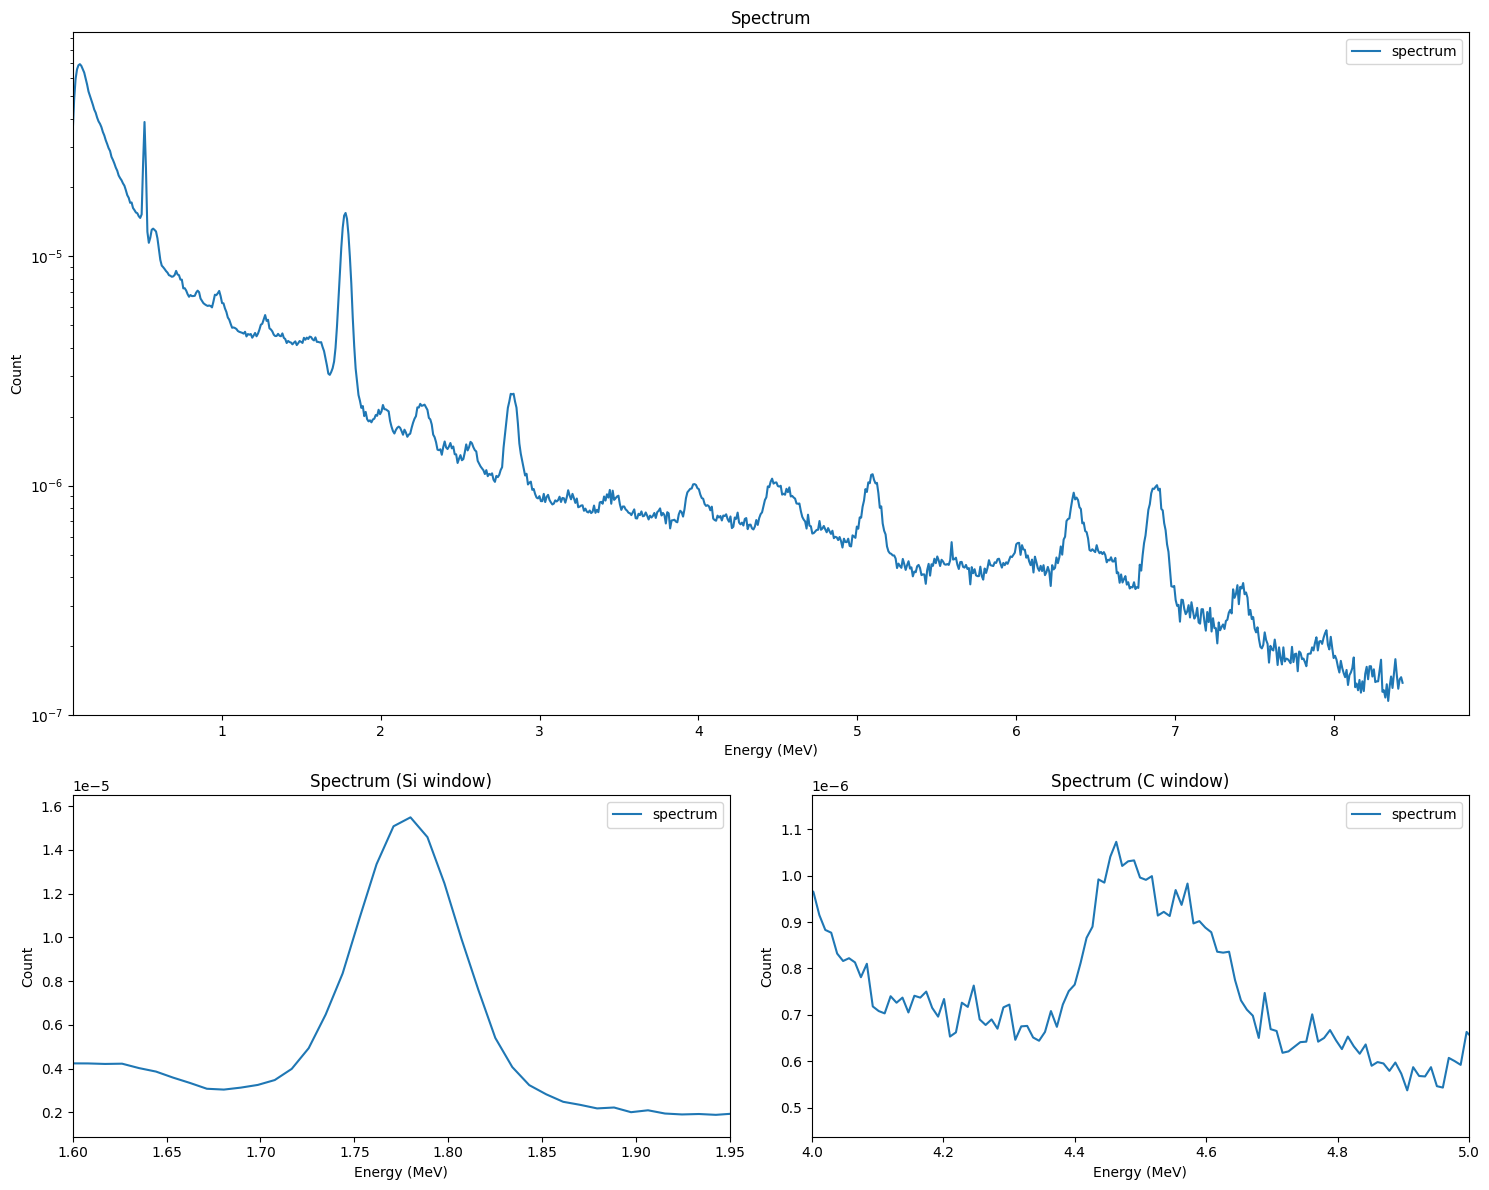

In [102]:
fig, axs = plt.subplot_mosaic(
    [['full_spectrum', 'full_spectrum'], ['si_window', 'c_window']],
    figsize=(15, 12),
    gridspec_kw={'height_ratios': [2, 1]}
)

# Plot 1: Full spectrum
axs['full_spectrum'].plot(bins[8:], working_row['spectrum'][8:], label='spectrum')
axs['full_spectrum'].set_xlabel('Energy (MeV)')
axs['full_spectrum'].set_ylabel('Count')
axs['full_spectrum'].legend()
axs['full_spectrum'].set_title('Spectrum')
axs['full_spectrum'].set_yscale('log')
axs['full_spectrum'].set_xlim(left=bins[8])
axs['full_spectrum'].set_ylim(bottom=1e-7)

# Plot 2: Si window
axs['si_window'].plot(bins[2:], working_row['spectrum'][2:], label='spectrum')
axs['si_window'].set_xlabel('Energy (MeV)')
axs['si_window'].set_ylabel('Count')
axs['si_window'].legend()
axs['si_window'].set_title('Spectrum (Si window)')
axs['si_window'].set_xlim(si_window[0], si_window[1])
axs['si_window'].set_ylim(si_spectrum_min, si_spectrum_max)

# Plot 3: C window
axs['c_window'].plot(bins[2:], working_row['spectrum'][2:], label='spectrum')
axs['c_window'].set_xlabel('Energy (MeV)')
axs['c_window'].set_ylabel('Count')
axs['c_window'].legend()
axs['c_window'].set_title('Spectrum (C window)')
axs['c_window'].set_xlim(c_window[0], c_window[1])
axs['c_window'].set_ylim(c_spectrum_min, c_spectrum_max)

plt.tight_layout()
plt.show()

# Analysis Method 1:

# Analysis Mathod 2: